Відрізок 1:
S_0(x) = 1.36 + -2.4460(x - 1.2) + 0.0000(x - 1.2)^2 + 34.9009(x - 1.2)^3, x належить [1.2, 1.4]
Відрізок 2:
S_1(x) = 1.15 + 1.7421(x - 1.4) + 20.9405(x - 1.4)^2 + -45.0841(x - 1.4)^3, x належить [1.4, 1.7]
Відрізок 3:
S_2(x) = 2.34 + 2.1337(x - 1.7) + -19.6352(x - 1.7)^2 + 20.2243(x - 1.7)^3, x належить [1.7, 2.3]
Відрізок 4:
S_3(x) = 0.92 + -1.1895(x - 2.3) + 16.7685(x - 2.3)^2 + 11.1790(x - 2.3)^3, x належить [2.3, 2.8]
Значення сплайна:
x = 1.20, y = 1.360
x = 1.22, y = 1.268
x = 1.23, y = 1.192
x = 1.25, y = 1.131
x = 1.26, y = 1.084
x = 1.28, y = 1.051
x = 1.30, y = 1.031
x = 1.31, y = 1.023
x = 1.33, y = 1.026
x = 1.35, y = 1.039
x = 1.36, y = 1.062
x = 1.38, y = 1.094
x = 1.39, y = 1.133
x = 1.41, y = 1.180
x = 1.43, y = 1.233
x = 1.44, y = 1.292
x = 1.46, y = 1.356
x = 1.47, y = 1.424
x = 1.49, y = 1.494
x = 1.51, y = 1.568
x = 1.52, y = 1.643
x = 1.54, y = 1.718
x = 1.56, y = 1.794
x = 1.57, y = 1.869
x = 1.59, y = 1.942
x = 1.60, y = 2.013
x = 1.62, y = 2.080
x =

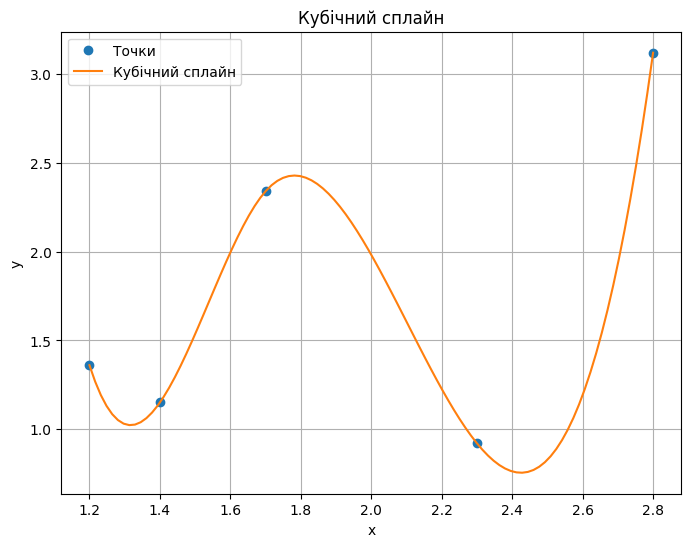

In [3]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Задані точки
x = np.array([1.2, 1.4, 1.7, 2.3, 2.8])
y = np.array([1.36, 1.15, 2.34, 0.92, 3.12])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)

# Обчислення коефіцієнтів сплайна
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Виправлення обчислення коефіцієнтів для останнього відрізка
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])

for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i]:.4f}(x - {x[i]}) + {c[i]:.4f}(x - {x[i]})^2 + {d[i]:.4f}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

#Значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
    print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()